In [35]:
import pandas as pd

In [36]:
dataset=pd.read_csv("db.csv")

In [37]:
dataset

,duration,marks,name,email,time
0,2,20,a,r,2
1,4,40,b,g,3
2,7,70,c,hh,7
3,8,80,d,hh,6
4,7,70,e,hh,8
5,3,30,f,hh,3
6,1,10,g,hh,7
7,5,50,h,hh,8


In [38]:
# y= marks          dependent       to be predicted
# x= duration       independent      us it to predict y

In [39]:
y=dataset["marks"]
x=dataset["duration"]

In [40]:
type(x)

pandas.core.series.Series

In [41]:
newx=x.values

In [42]:
type(newx)

numpy.ndarray

In [43]:
newx

array([2, 4, 7, 8, 7, 3, 1, 5], dtype=int64)

In [44]:
newx.shape

(8,)

In [45]:
X = newx.reshape(8,1)

In [46]:
X.shape

(8, 1)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model=LinearRegression()#object

In [49]:
model.fit(X,y)  #so fit is a function of sklearn which performs action
#internally it fits values in equation y=ax+b

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
yhat=model.predict([[9]])  #<--prdiction

In [51]:
yhat

array([90.])

In [52]:
 #so predict is a function of sklearn which performs action

In [53]:
model.coef_  #coefficient i.e it is "a" in y=ax+b

array([10.])

In [54]:
model.intercept_   # it value of "b" in y=ax+b

7.105427357601002e-15

# visualisation of data

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns   #this give more good look and fill

In [56]:
sns.set()   #now all the graphs created bymatplotlib will look better

Text(0, 0.5, 'marks')

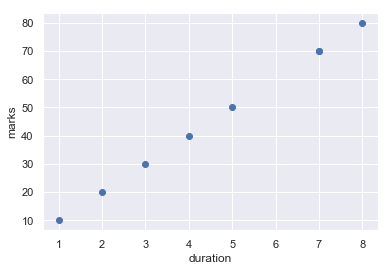

In [57]:
plt.scatter(X,y)  #scattered points
plt.xlabel("duration")
plt.ylabel("marks")

Text(0, 0.5, 'marks')

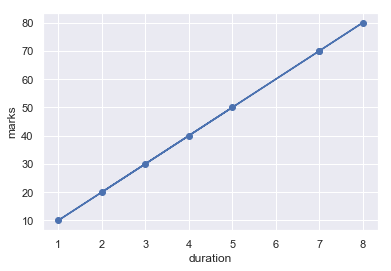

In [58]:
plt.plot(X,y,marker="o")  #points in line 
# marker = "o" means at the data points there will be a "o" or dot 
plt.xlabel("duration")
plt.ylabel("marks")

In [59]:
from sklearn.externals import joblib
#pickle lib

In [60]:
joblib.dump(model,"mymarkmodel.pk1")

['mymarkmodel.pk1']

In [61]:
#using joblib we saved our model in our harddisk,
# so in future if we again open this file we don't 
# need to again train our model.
# we  saved our model in a pickle file called "mymarkmodel.pk1"

# also we can load this model anwhere else and can use it

In [62]:
# we can load this model as
#import sklearn.externals import joblib
#model=joblib.load("mymarkmodel.pk1")

# errors

In [63]:
from sklearn import metrics

In [64]:
metrics.mean_absolute_error(X,y)

41.625

In [65]:
metrics.mean_squared_error(X,y)

2197.125

#  working on training and testing set

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [78]:
X_train

array([[5],
       [7],
       [7],
       [8],
       [1]], dtype=int64)

In [79]:
X_test

array([[4],
       [3],
       [2]], dtype=int64)

In [80]:
y_train

7    50
2    70
4    70
3    80
6    10
Name: marks, dtype: int64

In [81]:
y_test

1    40
5    30
0    20
Name: marks, dtype: int64

In [68]:
model.fit(X_train,y_train)  #training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
model.predict(X_test)   #testing on our test data

array([40., 30., 20.])

In [70]:
y_test  #<-- this was the actual answers of testing set

1    40
5    30
0    20
Name: marks, dtype: int64

In [71]:
y_pred=model.predict(X_test)   #testing on our test data

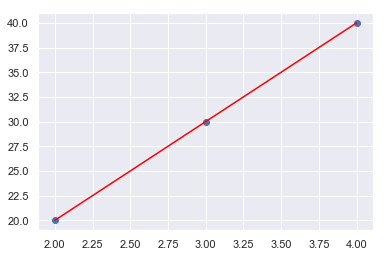

In [72]:
plt.scatter(X_test,y_test)    #actual
plt.plot(X_test,y_pred,color="red")    #predicted
#comparing prediction and actual values